In [16]:
import json
import sys
import os
import time
import numpy as np
import skimage.transform
import networkx as nx
import cv2

import matplotlib.pyplot as plt

In [17]:
def load_image(scanId, viewpointId):
    HEIGHT = 1024
    WIDTH = 1024
    pano_img = np.zeros((HEIGHT, WIDTH*4, 3), np.uint8)

    for i in range(4):
        image_path = viewpointId + f"_skybox{i + 1}_sami.jpg"
        abs_path = "/home/jiossandon/datasets/Matterport3DSimulator/data/v1/scans"
        rel_path = f"{abs_path}/{scanId}/matterport_skybox_images/{image_path}"
        im = cv2.imread(rel_path)  
        pano_img[:, WIDTH*i:WIDTH*(i+1), :] = im[..., ::-1]
    return pano_img

In [32]:
scanId = '2t7WUuJeko7'
viewpointId = '1e6b606b44df4a6086c0f97e826d4d15'

img = load_image(scanId, viewpointId)

In [20]:
# FOR SCAN ID 17DRP5sb8fy AND VIEWPOINT 00ebbf3782c64d74aaf7dd39cd561175

mirror_center = [4.62341, -0.531252, 1.47571]
toilet_paper_center = [4.56925, -1.76356, 0.847978]

In [37]:
data_path = "/home/jiossandon/datasets/Matterport3DSimulator/houses/v1/scans/2t7WUuJeko7/2t7WUuJeko7/house_segmentations/2t7WUuJeko7.house"

with open(data_path, 'r') as file:
    lines = file.readlines()

parsed_lines = []

for line in lines:
    separated_line = line.split(" ")
    while ("" in separated_line):
        separated_line.remove("")
    parsed_lines.append(separated_line)

In [38]:
def get_region(viewpointId):
    for line in parsed_lines:
        if line[0] != 'P': 
            continue
        
        if line[1] == viewpointId:
            return line[3]

get_region('1e6b606b44df4a6086c0f97e826d4d15')

'0'

In [39]:
def get_object_name(object_line):
    category_index = object_line[3]
    for line in parsed_lines:
        if line[0] != 'C':
            continue
        
        if line[1] == category_index:
            return line[3]

def get_objects_names_and_positions(viewpointId):
    region = get_region(viewpointId)
    objects = []
    for line in parsed_lines:
        if line[0] != 'O':
            continue
            
        if line[2] == region:
            objects.append(line[4:7] + [get_object_name(line)])
            
    return objects


get_objects_names_and_positions('1e6b606b44df4a6086c0f97e826d4d15')
            

[['2.63958', '0.00643587', '1.69318', 'wall'],
 ['3.39208', '-1.72134', '1.13262', 'door'],
 ['6.21824', '-1.92741', '1.12234', 'door#frame'],
 ['4.98773', '-1.61362', '0.41786', 'side#table'],
 ['2.64158', '-0.00126332', '3.3349', 'ceiling'],
 ['4.78557', '-0.0224187', '0.480455', 'table'],
 ['6.91861', '-0.986229', '1.11696', 'door#frame'],
 ['1.32638', '-1.14478', '0.638174', 'sofa#chair'],
 ['4.10371', '1.84683', '1.45428', 'curtain'],
 ['3.05676', '1.56967', '0.9271', 'piano'],
 ['5.10906', '1.84494', '1.55388', 'side#table'],
 ['5.34511', '1.57566', '0.472343', 'chair'],
 ['2.33113', '-1.66701', '0.951996', 'shelf'],
 ['-0.972956', '-1.43641', '1.51783', 'window'],
 ['2.64289', '-0.0889649', '1.68376', 'unknown'],
 ['5.82705', '1.56286', '1.5491', 'picture'],
 ['2.69791', '-0.100226', '0.245227', 'floor'],
 ['4.50181', '-0.42772', '0.555892', 'chair'],
 ['5.47075', '-0.380116', '0.564272', 'remove'],
 ['2.07321', '1.5697', '0.90549', 'statue'],
 ['-1.0515', '1.34107', '1.46016', 

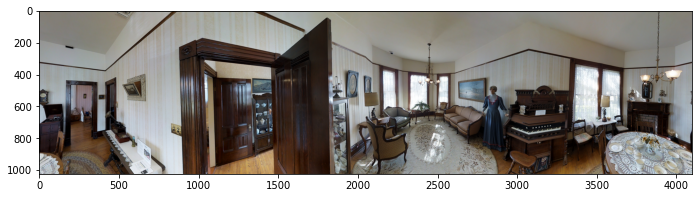

In [33]:
plt.figure(figsize=(18, 3))
plt.imshow(img)
plt.show()